# Book Analysis

Import Dependencies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns



# plt.rcParams.update({'font.size': 22})

In [28]:
# load data set
dataset = pd.read_csv('books.csv',error_bad_lines=False)

dataset.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# Data preparation

In [29]:
# check data shape 

print("Rows  Columns")
print(list(dataset.shape))

Rows  Columns
[11123, 12]


In [30]:
# check data columns
dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [31]:
#rename the columns
dataset.rename(columns={
    'bookID': 'book_id', 
    '  num_pages': 'num_pages'
}, inplace=True)

In [32]:
# check data_type
dict(dataset.dtypes)

{'book_id': dtype('int64'),
 'title': dtype('O'),
 'authors': dtype('O'),
 'average_rating': dtype('float64'),
 'isbn': dtype('O'),
 'isbn13': dtype('int64'),
 'language_code': dtype('O'),
 'num_pages': dtype('int64'),
 'ratings_count': dtype('int64'),
 'text_reviews_count': dtype('int64'),
 'publication_date': dtype('O'),
 'publisher': dtype('O')}

In [33]:
# check null values
pd.DataFrame(dataset.isnull().any(),columns=["Is Null"])

# most columns have null values we have to clean 

,Is Null
book_id,False
title,False
authors,False
average_rating,False
isbn,False
isbn13,False
language_code,False
num_pages,False
ratings_count,False
text_reviews_count,False


In [34]:
# Check if there's any duplicate value 
if dataset.duplicated().any():
    print("There are duplicate values")
else:
    print("No duplicated value :) ")


No duplicated value :) 


In [35]:
# Find how many authors name as NOT a BOOK
print('\nBooks with authors name as `NOT A BOOK`:',len(dataset[dataset['authors']=='NOT A BOOK']))
dataset[dataset['authors']=='NOT A BOOK']


Books with authors name as `NOT A BOOK`: 5


,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5475,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


In [36]:
# Remove data that has authors name as NOT a BOOK
dataset = dataset[dataset['authors']!='NOT A BOOK']

In [37]:

print('\nBooks with authors name as `NOT A BOOK`:',len(dataset[dataset['authors']=='NOT A BOOK']))


Books with authors name as `NOT A BOOK`: 0


In [38]:
# Check if there any book that has 0 page

if len(dataset[dataset['num_pages'] == 0]): print("There are books with 0 page. Amount: ",len(dataset[dataset['num_pages'] == 0]))
else: print('There aren\'t any book with 0 pages')



There are books with 0 page. Amount:  74


In [39]:
# Remove books that has 0 page 

dataset = dataset[dataset['num_pages'] != 0]

In [40]:
# Check if there any book that has 0 page

if len(dataset[dataset['num_pages'] == 0]): print("There are books with 0 page. Amount: ",len(dataset[dataset['num_pages'] == 0]))
else: print('There aren\'t any book with 0 pages')

There aren't any book with 0 pages


# Data Analysis

Countries Information

In [41]:
sum_rating = dataset['ratings_count'].sum()
sum_rating

199549506

In [42]:
# Books with highest rating

highest_rating = dataset['average_rating'].max()

book_highest_rating = dataset[dataset['average_rating'] >= highest_rating] 

print("Total numbers of books with highest average rating = ",len(book_highest_rating))

book_highest_rating



Total numbers of books with highest average rating =  20


,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,9/1/2006,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,1/1/2002,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,3/6/2003,BradyGames
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
5647,20954,Winchester Shotguns,Dennis Adler/R.L. Wilson,5.0,0785821082,9780785821083,eng,372,2,0,5/15/2008,Chartwell Books
5648,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l


In [43]:
# Books with lowest rating

lowest_rating = dataset['average_rating'].min()

book_lowest_rating = dataset[dataset['average_rating'] <= lowest_rating] 

print("Total numbers of books with lowest average rating = ",len(book_lowest_rating))

book_lowest_rating



Total numbers of books with lowest average rating =  25


,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
3492,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
4241,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
4677,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge
5323,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,0916724948,9780916724948,eng,63,0,0,12/31/1997,Arts Publications


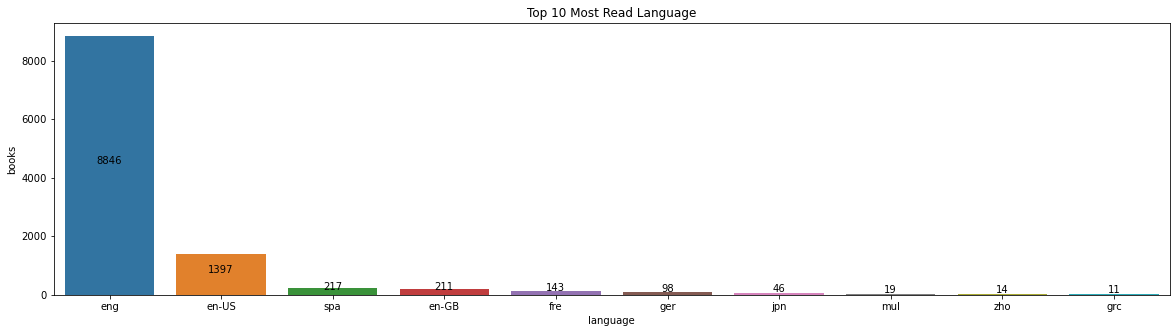

In [44]:
# Top 10 most read language

most_read = dataset['language_code'].value_counts().reset_index().iloc[0:10]
most_read.rename(columns={'index': 'language','language_code': 'books'},inplace=True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x='language',y='books',data=most_read)

for rect in ax.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom')
plt.title('Top 10 Most Read Language')
plt.show()

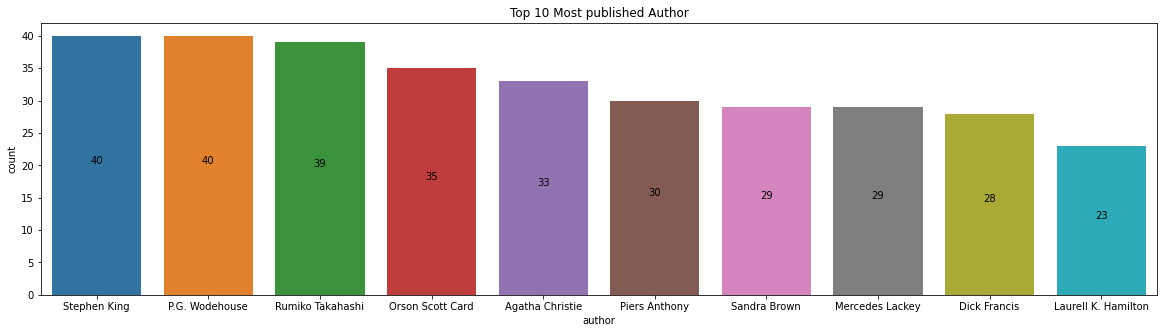

In [45]:
# Most published Author 

most_pub = dataset['authors'].value_counts().reset_index().iloc[0:10]
most_pub.rename(columns={'index': 'author','authors': 'count'},inplace=True)
plt.figure(figsize=(20,5))
ax= sns.barplot(x='author',y='count',data=most_pub)

for rect in ax.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom')
plt.title('Top 10 Most published Author')
plt.show()

/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/khay/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

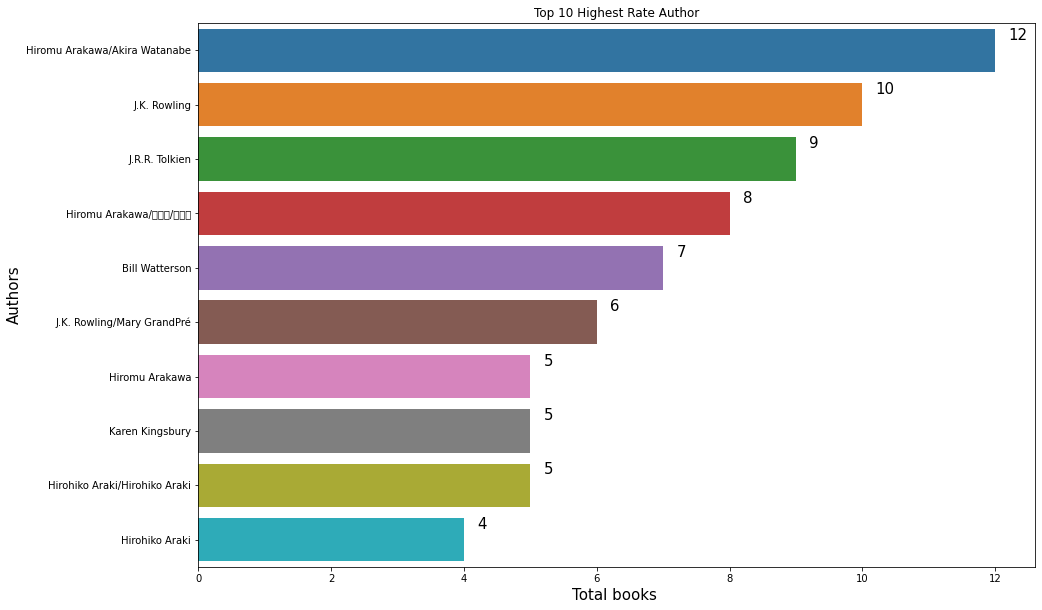

In [46]:
# Highest rate authors

highest_rate_author = dataset[dataset['average_rating'] > 4.4].groupby('authors')['title'].count().reset_index().sort_values(by='title',ascending=False).head(10)
highest_rate_author.rename(columns={'title':'count'},inplace=True)
plt.figure(figsize=(15,10))
ax =sns.barplot(x='count',y='authors',data=highest_rate_author)
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
plt.title('Top 10 Highest Rate Author')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

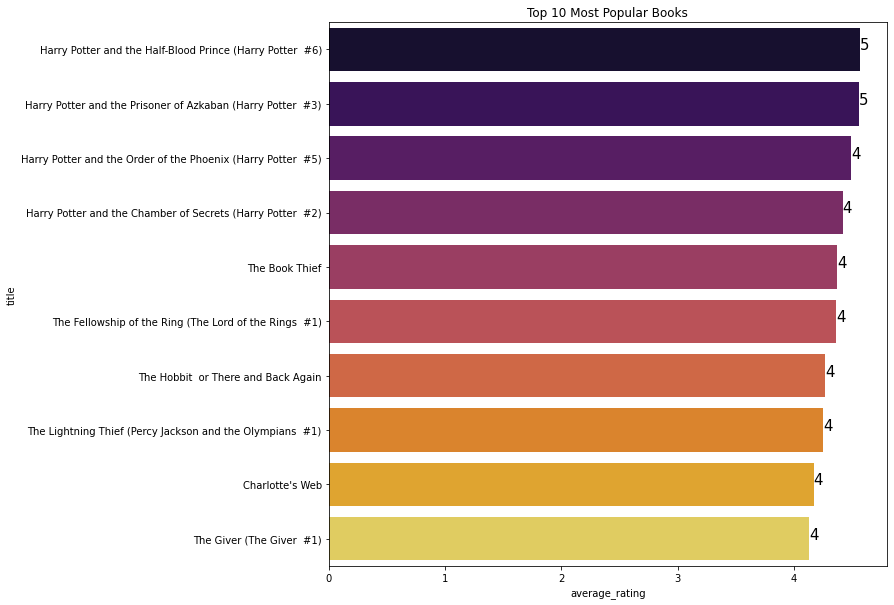

In [47]:
# Top 10 Most popular book
most_popular_book = dataset[dataset['ratings_count'] >= 1000000].sort_values(by='average_rating',ascending=False).iloc[0:10]
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Top 10 Most Popular Books')
ax= sns.barplot(x="average_rating", y="title", data=most_popular_book, palette='inferno')


totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.4,str(round(i.get_width())), fontsize=15,color='black')

plt.show()



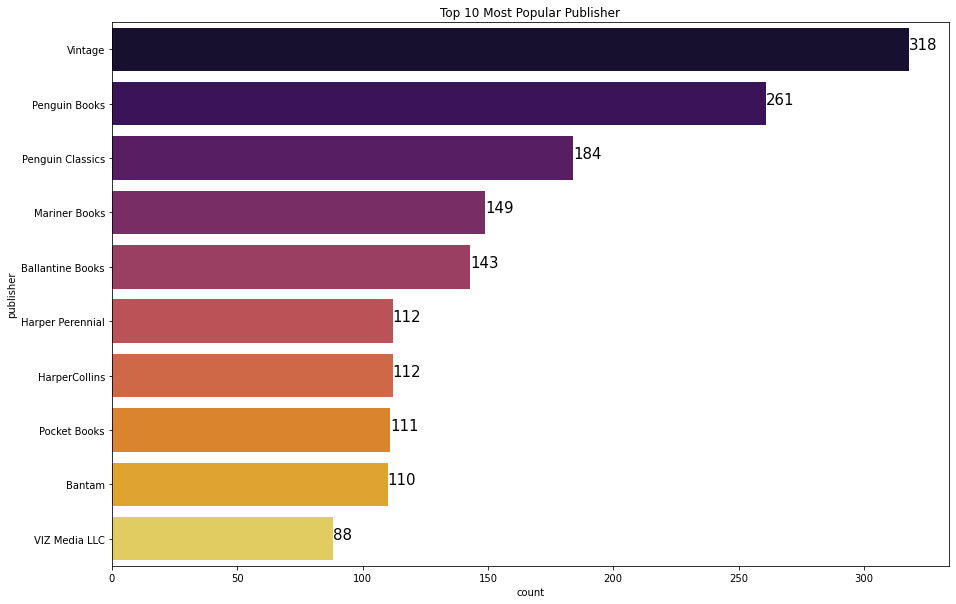

In [48]:
# Most Popular Publisher

most_popular_publisher = dataset['publisher'].value_counts().reset_index()
most_popular_publisher.rename(columns={'index': 'publisher','publisher': 'count'},inplace=True)
most_popular_publisher =most_popular_publisher.iloc[0:10].sort_values(by="count",ascending=False)
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Top 10 Most Popular Publisher')
ax= sns.barplot(x="count", y="publisher", data=most_popular_publisher, palette='inferno')

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.4,str(round(i.get_width())), fontsize=15,color='black')

plt.show()

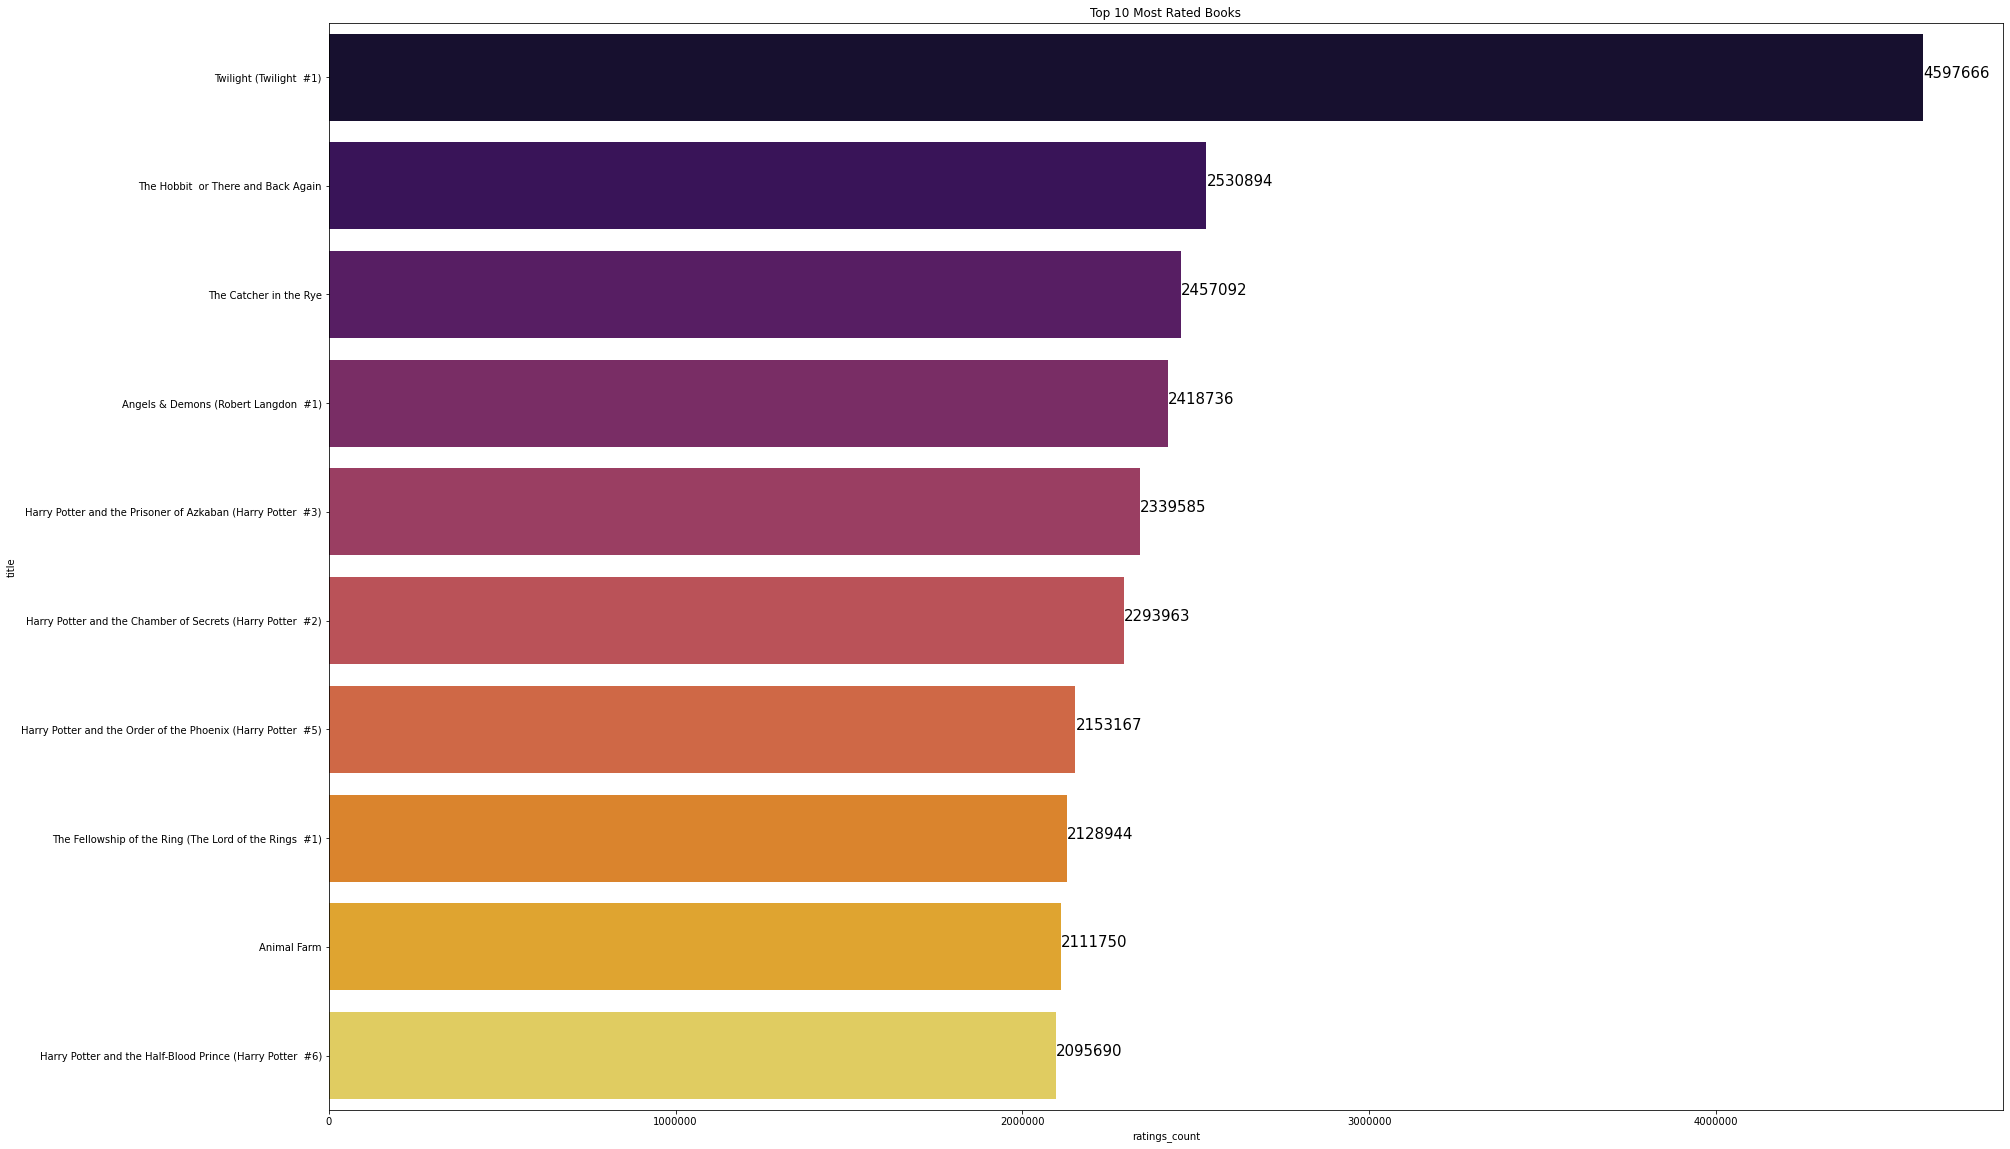

In [49]:
# Top 10 most rated book

most_rated_book = dataset.sort_values(by='ratings_count',ascending=False).head(10)
plt.figure(figsize=(30,20))
ax = sns.barplot(x=most_rated_book['ratings_count'], y=most_rated_book.title, palette = 'inferno')
totals = []

plt.title('Top 10 Most Rated Books')
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.4,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

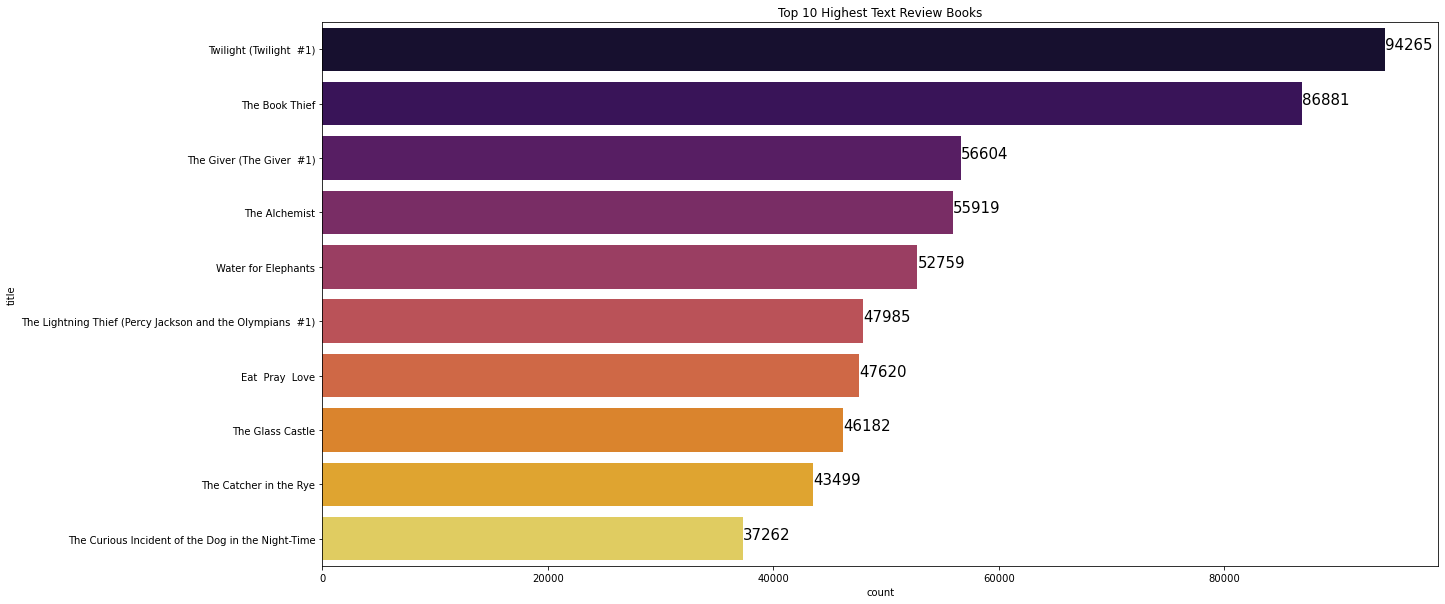

In [50]:
# Books with highest text reviews


highest_text_review =  dataset.groupby('title')['text_reviews_count'].sum().reset_index().sort_values(by='text_reviews_count',ascending=False).head(10)
highest_text_review.rename(columns={'text_reviews_count': 'count'},inplace=True)

plt.figure(figsize=(20,10))
ax = sns.barplot(x=highest_text_review['count'], y=highest_text_review['title'], palette = 'inferno')
totals = []


plt.title('Top 10 Highest Text Review Books')
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.4,str(round(i.get_width())), fontsize=15,color='black')
plt.show()
